In [22]:
from helper_functions import *
from multi_armed_bandits_algorithms import *
from multi_armed_environment import *
from multi_armed_epsilon_greedy import *
from multi_armed_ucb import *
import numpy as np

np.random.seed(0)

# This is the new jupyter notebook containing all algorithms with their environment separated : 

In [23]:
# sub-optimality gap
GAPS = [0.01, 0.02, 0.1, 0.2, 0.5]

def probability_distribution_by_gaps(n_arms, gaps):
    # Array of list of arms Probabilities repartitions
    array_probs = []

    # Probability repartition with sub-optimality gap
    for gap in gaps:

        # probability of success for the second best arm as a random number between 0 and 0.5
        p_second_best = np.random.rand() * (1 - gap)

        # probability of success for the best arm
        p_best = p_second_best + gap

        # calculate the other arm probabilities as random between 0 and p_second_best
        probs = np.random.rand(n_arms - 2) * p_second_best

        # add the best and second best arm probabilities
        probs = np.append(probs, [p_best, p_second_best])

        # shuffle the probabilities and add them to the list
        np.random.shuffle(probs)
        array_probs.append(probs)

    return array_probs

## Epsilon greedy with suboptimality gap 0.02

In [24]:
n_simulations = 100
n_arms =  6
n_steps = 500
true_probs = [0.86734392, 0.66409692, 0.47770636, 0.65307993, 0.84734392, 0.13106454] # probability_distribution_by_gaps(n_arms, [0.02])[0] # np.random.rand(n_arms)
max_reward = 1.0
rewards_associated = np.ones(n_arms) # * max_reward * np.random.rand(n_arms)
epsilons = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5]

print(true_probs)
print(rewards_associated)

[0.86734392, 0.66409692, 0.47770636, 0.65307993, 0.84734392, 0.13106454]
[1. 1. 1. 1. 1. 1.]


In [25]:
regrets = run_epsilon_greedy_for_different_epsilons(n_simulations, n_arms, n_steps, true_probs, rewards_associated, epsilons)

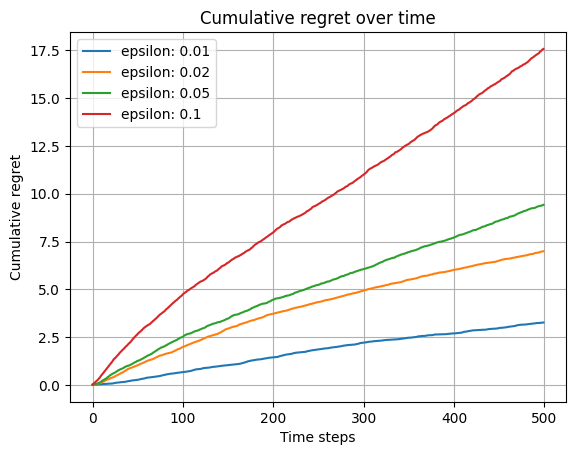

In [26]:
plot_cumulative_regrets(regrets[:4], ["epsilon: 0.01", "epsilon: 0.02", "epsilon: 0.05", "epsilon: 0.1", "epsilon: 0.2"])

In [27]:
true_probs = [0.2451019, 0.1434964, 0.34096024, 0.44358828, 0.4324698, 0.64358828] # probability_distribution_by_gaps(n_arms, [0.2])[0]
print(true_probs)

[0.2451019, 0.1434964, 0.34096024, 0.44358828, 0.4324698, 0.64358828]


In [28]:
regrets = run_epsilon_greedy_for_different_epsilons(n_simulations, n_arms, n_steps, true_probs, rewards_associated, epsilons)

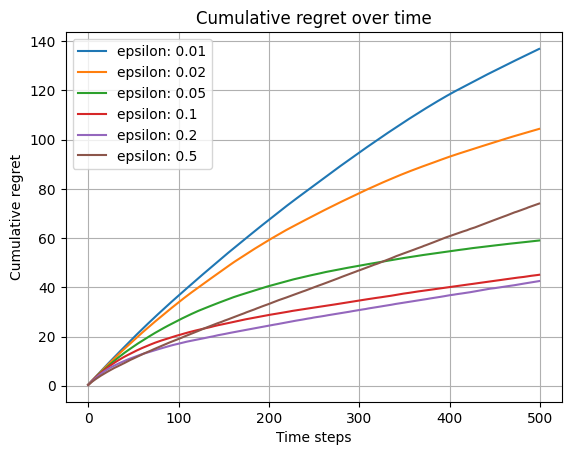

In [29]:
plot_cumulative_regrets(regrets, ["epsilon: 0.01", "epsilon: 0.02", "epsilon: 0.05", "epsilon: 0.1", "epsilon: 0.2", "epsilon: 0.5"])

## UCB with suboptimality gap 0.02


In [30]:
n_simulations = 100
n_arms =  6
n_steps = 500
true_probs = [0.86734392, 0.66409692, 0.47770636, 0.65307993, 0.84734392, 0.13106454] # probability_distribution_by_gaps(n_arms, [0.02])[0] # np.random.rand(n_arms)
max_reward = 1.0
rewards_associated = np.ones(n_arms) # * max_reward * np.random.rand(n_arms)
c_list = [0.01, 0.1, 0.5, 0.8, 0.9, 1.0, 2.0]

print(true_probs)
print(rewards_associated)

[0.86734392, 0.66409692, 0.47770636, 0.65307993, 0.84734392, 0.13106454]
[1. 1. 1. 1. 1. 1.]


In [31]:
regrets = run_multi_armed_ucb_average_for_different_c_values(n_simulations, n_arms, n_steps, true_probs, rewards_associated, c_list)

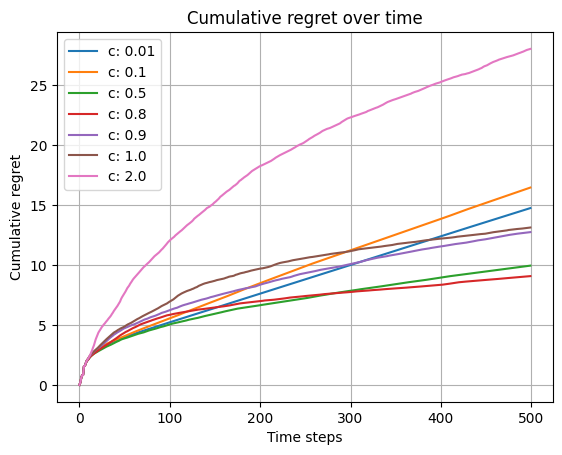

In [32]:
plot_cumulative_regrets(regrets, ["c: 0.01", "c: 0.1", "c: 0.5", "c: 0.8", "c: 0.9", "c: 1.0", "c: 2.0"])

## UCB with suboptimality gap 0.2

In [33]:
true_probs = [0.2451019, 0.1434964, 0.34096024, 0.44358828, 0.4324698, 0.64358828] # probability_distribution_by_gaps(n_arms, [0.2])[0]
print(true_probs)

[0.2451019, 0.1434964, 0.34096024, 0.44358828, 0.4324698, 0.64358828]


In [34]:
regrets = run_multi_armed_ucb_average_for_different_c_values(n_simulations, n_arms, n_steps, true_probs, rewards_associated, c_list)

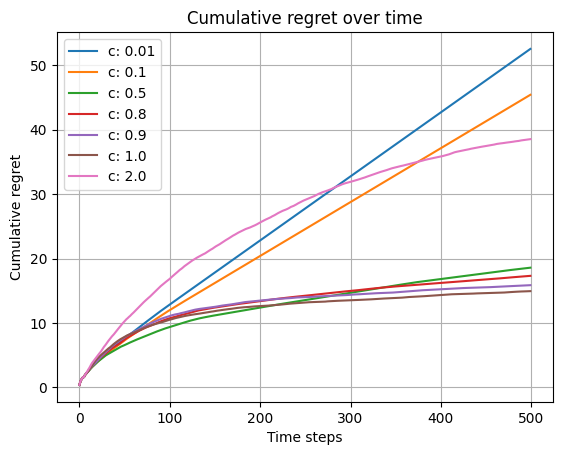

In [35]:
plot_cumulative_regrets(regrets, ["c: 0.01", "c: 0.1", "c: 0.5", "c: 0.8", "c: 0.9", "c: 1.0", "c: 2.0"])